In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras import utils
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar100
(x_train, Y_train), (x_test, Y_test) = cifar100.load_data()

print("Train samples:", x_train.shape, Y_train.shape)
print("Test samples:", x_test.shape, Y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [3]:
Y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [4]:
NUM_CLASSES = 100
cifar100_classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle',
 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
  'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
   'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 
    'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 
    'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 
    'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
    'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 
    'wolf', 'woman', 'worm']

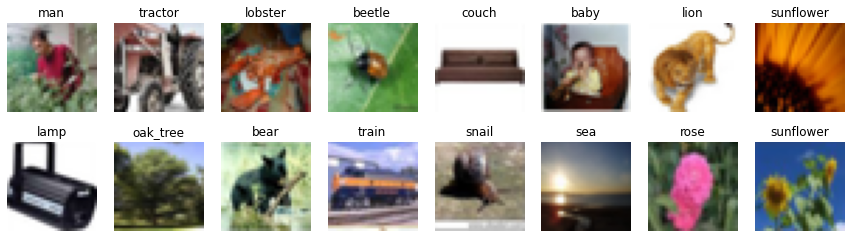

In [5]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(Y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar100_classes[Y_train[random_index, 0]])
plt.show()


In [6]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

x_train.shape

(50000, 32, 32, 3)

In [7]:
y_train = utils.to_categorical(Y_train, num_classes=NUM_CLASSES)
y_test = utils.to_categorical(Y_test, num_classes=NUM_CLASSES)

y_train[0], y_test[0]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

BatchNormalization()
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(100))


model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12, 12, 64)        0

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [10]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [11]:
train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

In [12]:
with tf.device('/cpu:0'): 
    model.fit(train_generator, steps_per_epoch=20000//64, epochs=10,
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/10
312/312 [==============================] - 30s 97ms/step - loss: 4.0661 - accuracy: 0.0803 - val_loss: 3.6277 - val_accuracy: 0.1478
Epoch 2/10
312/312 [==============================] - 28s 90ms/step - loss: 3.5144 - accuracy: 0.1667 - val_loss: 3.3005 - val_accuracy: 0.2062
Epoch 3/10
312/312 [==============================] - 30s 97ms/step - loss: 3.1794 - accuracy: 0.2244 - val_loss: 3.0226 - val_accuracy: 0.2574
Epoch 4/10
312/312 [==============================] - 29s 93ms/step - loss: 2.9776 - accuracy: 0.2644 - val_loss: 2.8896 - val_accuracy: 0.2902
Epoch 5/10
312/312 [==============================] - 28s 90ms/step - loss: 2.7932 - accuracy: 0.3021 - val_loss: 2.7135 - val_accuracy: 0.3267
Epoch 6/10
312/312 [==============================] - 29s 92ms/step - loss: 2.6493 - accuracy: 0.3284 - val_loss: 2.5911 - val_accuracy: 0.3558
Epoch 7/10
312/312 [==============================] - 29s 94ms/step - loss: 2.5536 - accuracy: 0.3508 - val_loss: 2.5003 - val_accuracy:

In [13]:
with tf.device('/cpu:0'): 
    score = model.evaluate(x_test, y_test)
print('Test accuracy ->', score[1])


313/313 [==============================] - 4s 11ms/step - loss: 2.3030 - accuracy: 0.4130
Test accuracy -> 0.4129999876022339


In [14]:
with tf.device('/cpu:0'): 
    y_pred_test = model.predict(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_prob = np.max(y_pred_test, axis=1)


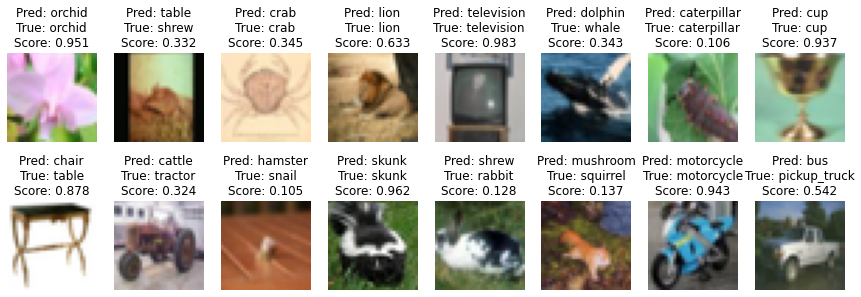

In [15]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(Y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar100_classes[y_pred_test_classes[random_index]]
        pred_prob = y_pred_test_max_prob[random_index]
        true_label = cifar100_classes[int(Y_test[random_index, 0])]
        ax.set_title(
            f"Pred: {pred_label}\nTrue: {true_label}\nScore: {pred_prob:.3}")
plt.show()